In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stock_data = pd.read_csv('/Users/ayann/Desktop/project folder/BDM/stockdetail.csv')
stock_data.columns
sales_data = pd.read_csv('/Users/ayann/Desktop/project folder/BDM/salesdetail.csv')
sales_data.columns

Index(['Transaction', 'Received Amount', 'Credit Amount', 'Cheque Amount',
       'Card Amount', 'Net Amount'],
      dtype='object')

In [3]:
stock_data.columns

Index(['NameToDisplay', 'ManufacturingCo', 'TaxRate', 'ProdMRP',
       'ProdSaleRate', 'OpStock', 'OpRate', 'OpValue', 'PurchaseQty',
       'PurchaseRate', 'PurchaseValue', 'SalesReturnRate', 'In Stock',
       'In Stock Rate', 'In Stock Value', 'SalesQty', 'SalesRate',
       'SalesValue', 'ShortageStockRate', 'Other Issues Value', 'Out Stock',
       'Out Stock Rate', 'Out Stock Value', 'Cl.Stock As On',
       'Closing Stock Rate', 'Cl.Value', 'Cur.Stock', 'Cur.Stock Rate',
       'Cur.Stock Value'],
      dtype='object')

In [2]:
stock_data['NameToDisplay'].nunique()

7743

Data Cleaning And Preprocessing

In [10]:
import pandas as pd

# Load the datasets
sales_data = pd.read_csv('/Users/ayann/Desktop/project folder/BDM/salesdetail.csv')
stock_data = pd.read_csv('/Users/ayann/Desktop/project folder/BDM/stockdetail.csv')

sales_info = sales_data.info()
stock_info = stock_data.info()

sales_head = sales_data.head()
stock_head = stock_data.head()

sales_info, stock_info, sales_head, stock_head

# Convert the 'OpValue' and 'Cl.Value' columns to numeric values in the stock dataset (currently object types)
stock_data['OpValue'] = pd.to_numeric(stock_data['OpValue'], errors='coerce')
stock_data['Cl.Value'] = pd.to_numeric(stock_data['Cl.Value'], errors='coerce')

# Handle missing values in the stock data
stock_data_cleaned = stock_data.fillna({
    'ManufacturingCo': 'Unknown',
    'OpValue': 0,
    'Cl.Value': 0
})

# Summary statistics for both datasets after cleaning
sales_summary = sales_data.describe()
stock_summary = stock_data_cleaned.describe()

sales_summary, stock_summary

# Stock-to-Sales Ratio
stock_data_cleaned['Stock_to_Sales_Ratio'] = stock_data_cleaned['In Stock'] / (stock_data_cleaned['SalesQty'] + 1e-6) 

# Inventory Turnover Ratio
stock_data_cleaned['Inventory_Turnover_Ratio'] = stock_data_cleaned['SalesQty'] / (stock_data_cleaned['In Stock'] + 1e-6)

# Summary of Stock-to-Sales Ratio and Inventory Turnover Ratio
stock_to_sales_summary = stock_data_cleaned[['NameToDisplay', 'In Stock', 'SalesQty', 'Stock_to_Sales_Ratio', 'Inventory_Turnover_Ratio']].describe()

#overstocked and understocked products based on thresholds
overstocked = stock_data_cleaned[stock_data_cleaned['Stock_to_Sales_Ratio'] > 10]
understocked = stock_data_cleaned[stock_data_cleaned['Inventory_Turnover_Ratio'] > 2]

# summaries and top 5 overstocked/understocked products
stock_to_sales_summary, overstocked.head(), understocked.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction      358 non-null    object 
 1   Received Amount  358 non-null    float64
 2   Credit Amount    358 non-null    float64
 3   Cheque Amount    358 non-null    float64
 4   Card Amount      358 non-null    float64
 5   Net Amount       358 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13170 entries, 0 to 13169
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NameToDisplay       13170 non-null  object 
 1   ManufacturingCo     11931 non-null  object 
 2   TaxRate             13170 non-null  int64  
 3   ProdMRP             13170 non-null  float64
 4   ProdSaleRate        13170 non-null  float64
 5   OpStock           

(           In Stock      SalesQty  Stock_to_Sales_Ratio  \
 count  1.317000e+04  1.317000e+04          1.317000e+04   
 mean   1.121600e+04  9.892825e+03          2.123637e+07   
 std    2.060039e+05  1.955868e+05          1.181512e+09   
 min    0.000000e+00  0.000000e+00          0.000000e+00   
 25%    1.000000e+00  1.000000e+00          9.725332e-01   
 50%    6.000000e+00  4.000000e+00          1.000000e+00   
 75%    2.400000e+01  2.000000e+01          1.500000e+00   
 max    1.153928e+07  1.183576e+07          1.200000e+11   
 
        Inventory_Turnover_Ratio  
 count              1.317000e+04  
 mean               7.099165e+07  
 std                3.779243e+09  
 min                0.000000e+00  
 25%                3.333332e-01  
 50%                8.437500e-01  
 75%                9.999998e-01  
 max                3.500000e+11  ,
                              NameToDisplay             ManufacturingCo  \
 36     ABBOTT SIMILAC INFANT FORMULA 400 G             HARI OM TRA

EDA

In [5]:
#EDA statistics

def calculate_eda_stats(data):
    return data.describe()

# EDA for Sales Data
sales_eda = calculate_eda_stats(sales_data)

# EDA for Stock Data
stock_eda = calculate_eda_stats(stock_data_cleaned)

print("Sales Data EDA:")
print(sales_eda)

print("\nStock Data EDA:")
print(stock_eda)

Sales Data EDA:
       Received Amount  Credit Amount  Cheque Amount  Card Amount  \
count       358.000000     358.000000          358.0   358.000000   
mean     141445.357542       4.692737            0.0     6.368715   
std       58751.249390      63.234839            0.0   120.184048   
min       23656.000000       0.000000            0.0     0.000000   
25%       99636.750000       0.000000            0.0     0.000000   
50%      133532.500000       0.000000            0.0     0.000000   
75%      173480.250000       0.000000            0.0     0.000000   
max      366229.000000     950.000000            0.0  2274.000000   

          Net Amount  
count     358.000000  
mean   141456.418994  
std     58745.885246  
min     23656.000000  
25%     99636.750000  
50%    133532.500000  
75%    173480.250000  
max    366229.000000  

Stock Data EDA:
            TaxRate       ProdMRP  ProdSaleRate       OpStock        OpRate  \
count  13170.000000  13170.000000  13170.000000   13170.000

Sales By Day of Week

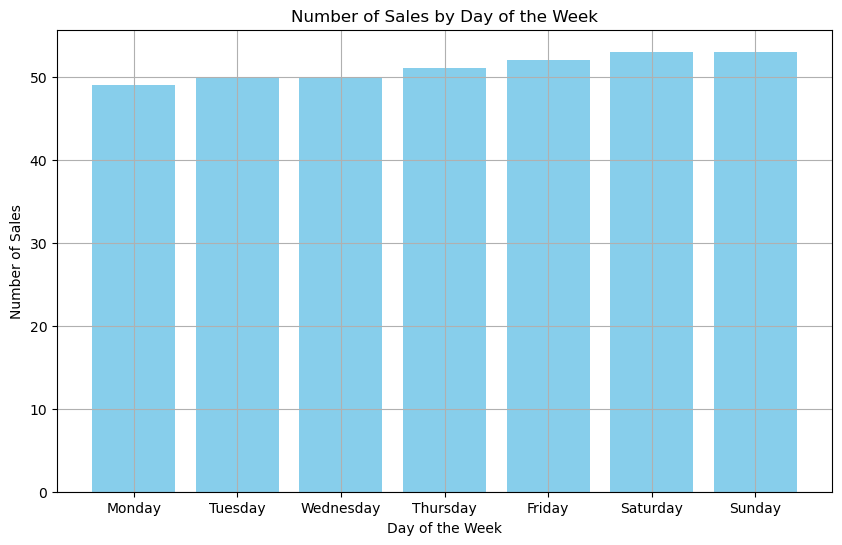

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
sales_data['Transaction'] = pd.to_datetime(sales_data['Transaction'], format="%d/%m/%Y", errors='coerce')

# Extract the day of the week from the 'Date' column (0=Monday, 6=Sunday)
sales_data['DayOfWeek'] = sales_data['Transaction'].dt.dayofweek

# Group by day of the week and calculate the number of sales (i.e., count the number of rows for each day)
sales_count_by_day_of_week = sales_data.groupby('DayOfWeek')['Received Amount'].count().reset_index()

# Map numeric day of week to actual day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sales_count_by_day_of_week['DayOfWeek'] = sales_count_by_day_of_week['DayOfWeek'].map(day_mapping)

sales_count_by_day_of_week['DayOfWeek'] = pd.Categorical(sales_count_by_day_of_week['DayOfWeek'], 
                                                         categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                         ordered=True)
sales_count_by_day_of_week = sales_count_by_day_of_week.sort_values('DayOfWeek')

# Plotting the number of sales by day of the week
plt.figure(figsize=(10, 6))
plt.bar(sales_count_by_day_of_week['DayOfWeek'], sales_count_by_day_of_week['Received Amount'], color='skyblue')
plt.title('Number of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()


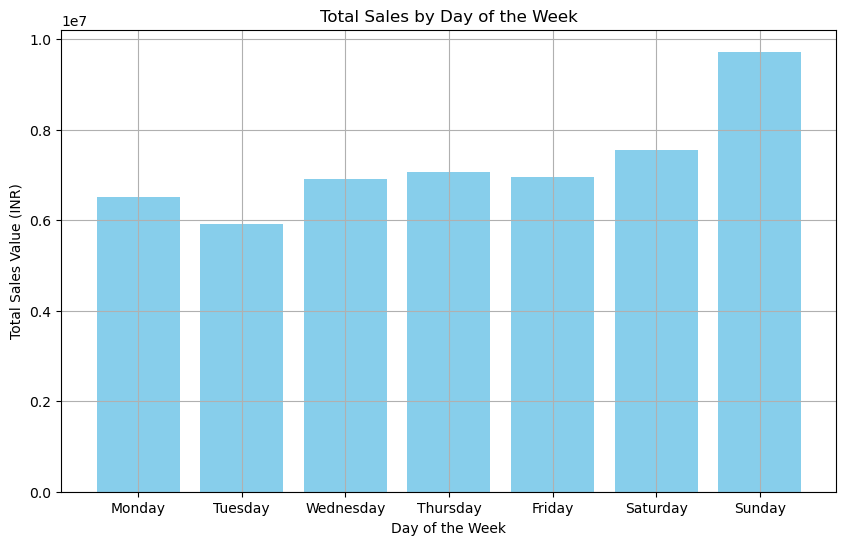

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sales_data['Transaction'] = pd.to_datetime(sales_data['Transaction'], format="%d/%m/%Y", errors='coerce')

#day of the week from the 'Date' column (0=Monday, 6=Sunday)
sales_data['DayOfWeek'] = sales_data['Transaction'].dt.dayofweek

# Group by day of the week and calculate total sales
sales_by_day_of_week = sales_data.groupby('DayOfWeek')['Received Amount'].sum().reset_index()

# Map numeric day of week to actual day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sales_by_day_of_week['DayOfWeek'] = sales_by_day_of_week['DayOfWeek'].map(day_mapping)

# Sort the DataFrame by the day of the week for correct order in the plot
sales_by_day_of_week['DayOfWeek'] = pd.Categorical(sales_by_day_of_week['DayOfWeek'], 
                                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                   ordered=True)
sales_by_day_of_week = sales_by_day_of_week.sort_values('DayOfWeek')

# Plotting the sales by day of the week
plt.figure(figsize=(10, 6))
plt.bar(sales_by_day_of_week['DayOfWeek'], sales_by_day_of_week['Received Amount'], color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Value (INR)')
plt.grid(True)
plt.show()


Item Segmentation

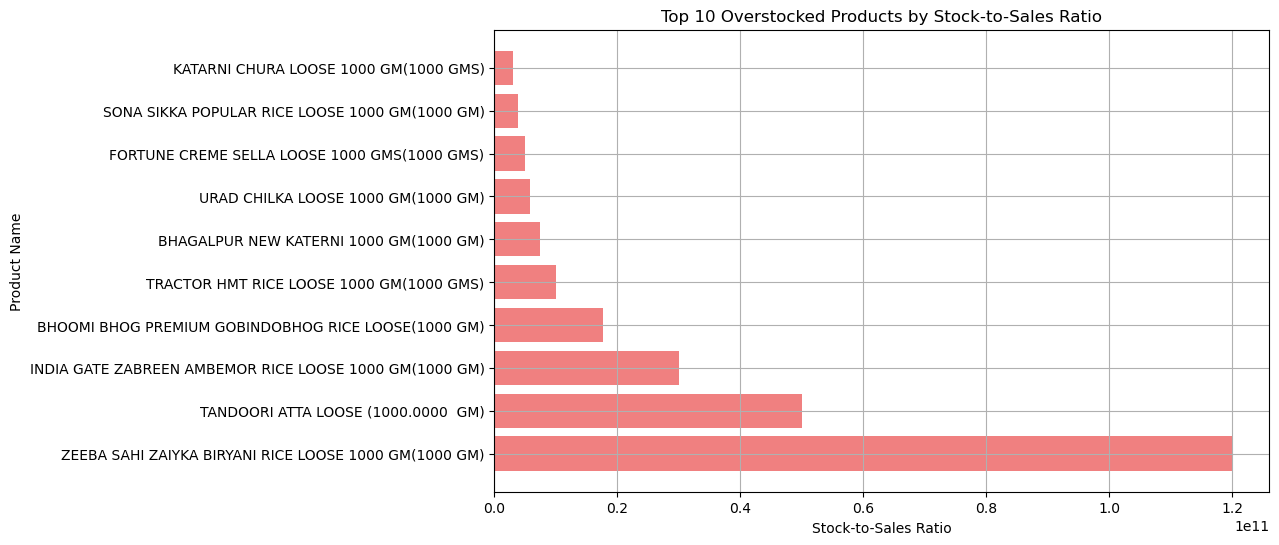

In [6]:
#Stock-to-Sales Ratio for top overstocked products
plt.figure(figsize=(10, 6))
overstocked_sorted = overstocked.sort_values(by='Stock_to_Sales_Ratio', ascending=False).head(10)
plt.barh(overstocked_sorted['NameToDisplay'], overstocked_sorted['Stock_to_Sales_Ratio'], color='lightcoral')
plt.title('Top 10 Overstocked Products by Stock-to-Sales Ratio')
plt.xlabel('Stock-to-Sales Ratio')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

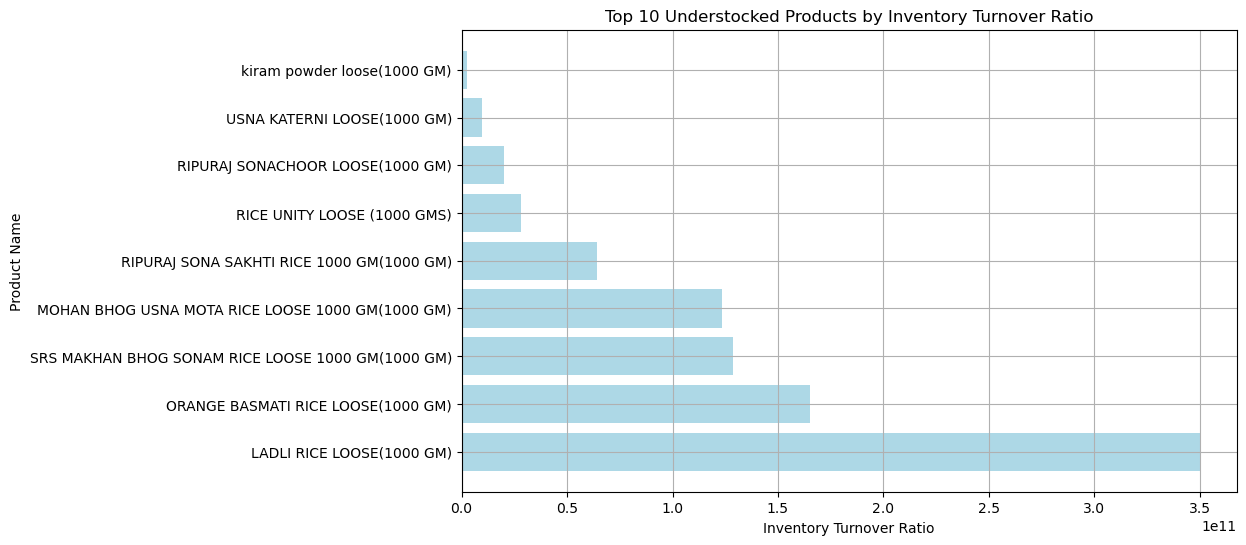

In [7]:
# Plotting the Inventory Turnover Ratio for top understocked products
plt.figure(figsize=(10, 6))
understocked_sorted = understocked.sort_values(by='Inventory_Turnover_Ratio', ascending=False).head(10)
plt.barh(understocked_sorted['NameToDisplay'], understocked_sorted['Inventory_Turnover_Ratio'], color='lightblue')
plt.title('Top 10 Understocked Products by Inventory Turnover Ratio')
plt.xlabel('Inventory Turnover Ratio')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

Pareto Analysis

In [8]:
# # Calculate the total sales amount for each product
# stock_data_cleaned['TotalSales'] = stock_data_cleaned['ProdSaleRate'] * stock_data_cleaned['PurchaseQty']

# # Summarize the data to calculate total sales amount by product
# sales_pareto_data = stock_data_cleaned.groupby('NameToDisplay')['TotalSales'].sum().sort_values(ascending=False).reset_index()

# # Calculate the cumulative percentage
# sales_pareto_data['Cumulative Percentage'] = sales_pareto_data['TotalSales'].cumsum() / sales_pareto_data['TotalSales'].sum() * 100

# # Identify the cut-off point in the plot for 80% cumulative sales
# cutoff_value = 80

# # Find the products that contribute up to the 80% cumulative percentage
# top_80_sales_products_corrected = sales_pareto_data[sales_pareto_data['Cumulative Percentage'] <= cutoff_value]

# # Display the table with products contributing to 80% of cumulative sales and their sales amounts
# top_80_sales_products_corrected[['NameToDisplay', 'TotalSales']]


,NameToDisplay,TotalSales
0,SUGAR BIG LOOSE(1000 GMS),699003000.0
1,RAHAR DAAL LOOSE 1000 GM(1000 GM),502471250.0
2,SUGAR BOLD loose(1000 GM),487170000.0
3,7 STAR RICE LOOSE(1000 GM),443191600.0
4,MOONG DAAL LOOSE 1000 GM(1000 GM),439737500.0
5,MAKHANA LOOSE 1000 GM(1000 GM),380664000.0
6,JEERA SPECIAL 1000 GM(1000 GM),365700000.0
7,MP BAG PIPER WHEAT LOOSE (1000 GMS),354904750.0
8,KAJU MEDIUM LOOSE 1000 GM(1000 GM),338400000.0
9,MASOOR DAAL LOOSE 1000 GM(1000 GM),336672000.0


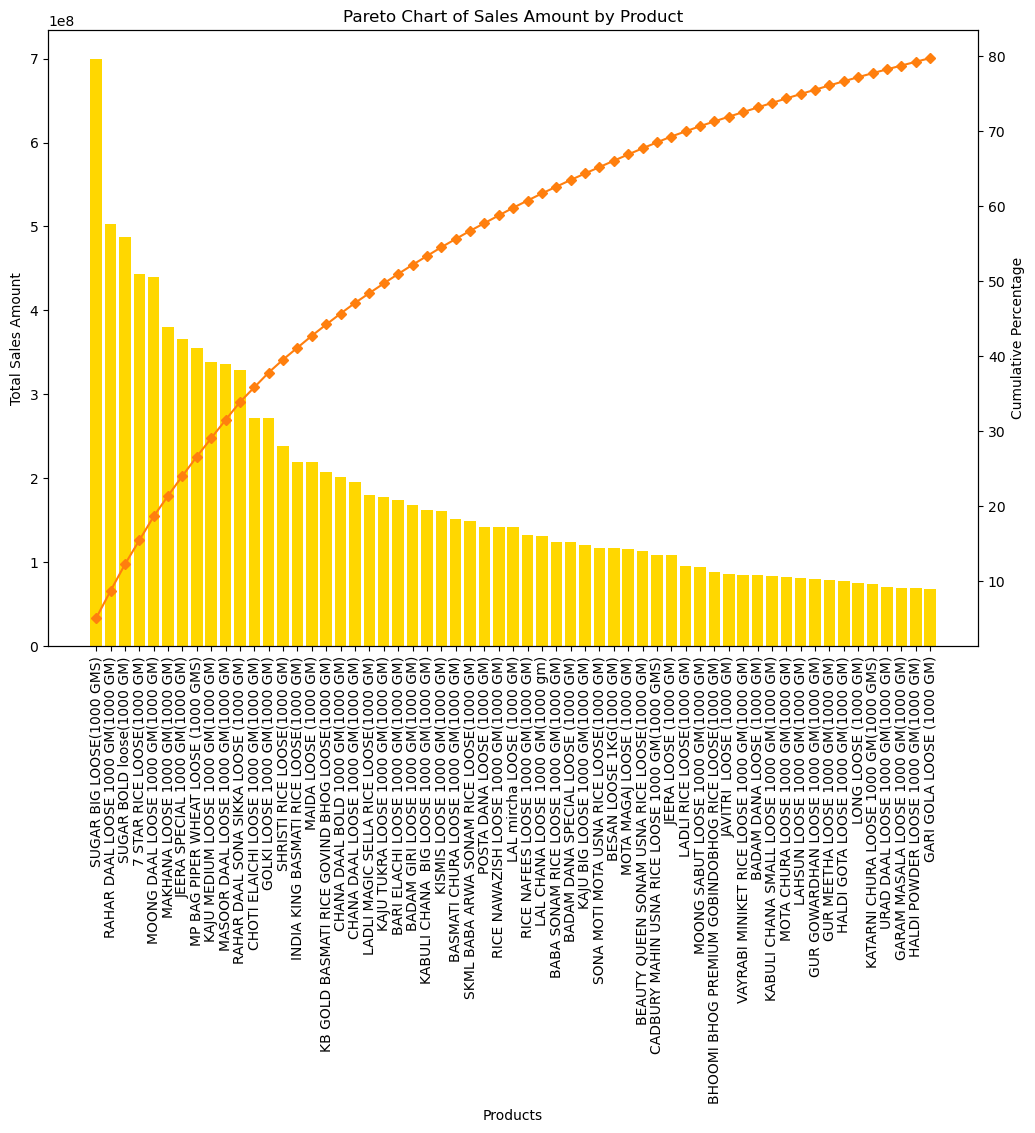

In [9]:
# # Recalculating the total sales amount for each product
# stock_data_cleaned['TotalSales'] = stock_data_cleaned['ProdSaleRate'] * stock_data_cleaned['PurchaseQty']

# # Summarizing the data to calculate total sales amount by product
# sales_pareto_data = stock_data_cleaned.groupby('NameToDisplay')['TotalSales'].sum().sort_values(ascending=False).reset_index()

# # Calculate the cumulative percentage
# sales_pareto_data['Cumulative Percentage'] = sales_pareto_data['TotalSales'].cumsum() / sales_pareto_data['TotalSales'].sum() * 100

# # Extracting the products contributing to 80% of the cumulative sales
# top_80_sales_products = sales_pareto_data[sales_pareto_data['Cumulative Percentage'] <= 80]

# # Plotting the Pareto chart for these products
# fig, ax = plt.subplots(figsize=(12, 8))

# ax.bar(top_80_sales_products['NameToDisplay'], top_80_sales_products['TotalSales'], color='gold')
# ax2 = ax.twinx()
# ax2.plot(top_80_sales_products['NameToDisplay'], top_80_sales_products['Cumulative Percentage'], color='C1', marker='D', ms=5)

# ax.set_title('Pareto Chart of Sales Amount by Product')
# ax.set_xlabel('Products')
# ax.set_ylabel('Total Sales Amount')
# ax2.set_ylabel('Cumulative Percentage')

# ax.tick_params(axis='x', rotation=90)

# plt.show()


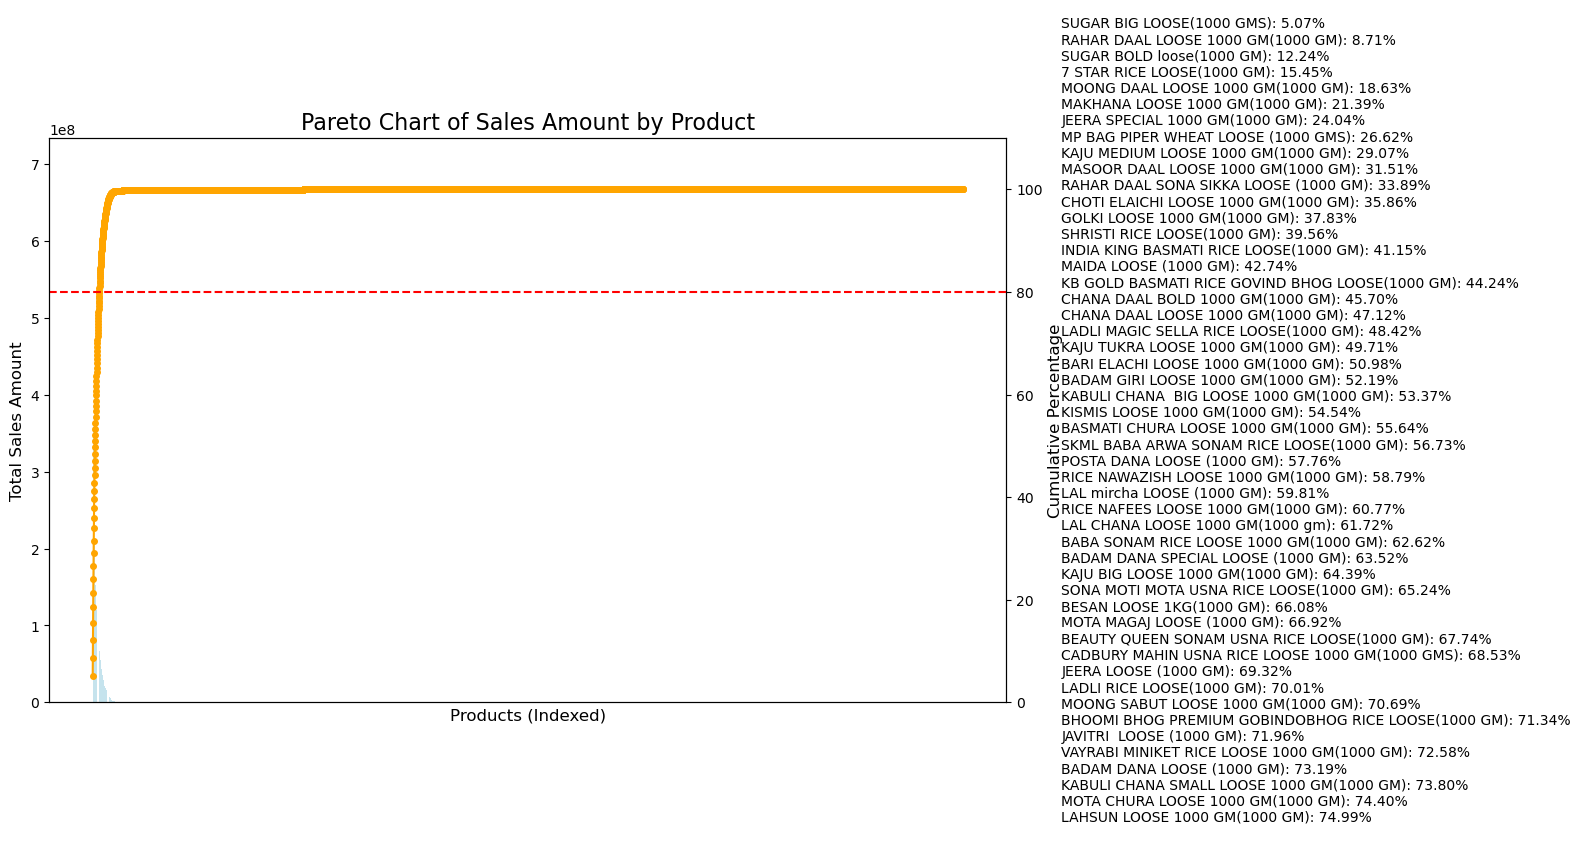

In [52]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, VPacker, HPacker, AnchoredOffsetbox

# Recalculating the total sales amount for each product
stock_data_cleaned['TotalSales'] = stock_data_cleaned['ProdSaleRate'] * stock_data_cleaned['PurchaseQty']

# Summarizing the data to calculate total sales amount by product
sales_pareto_data = stock_data_cleaned.groupby('NameToDisplay')['TotalSales'].sum().sort_values(ascending=False).reset_index()

# Calculate the cumulative percentage
sales_pareto_data['Cumulative Percentage'] = sales_pareto_data['TotalSales'].cumsum() / sales_pareto_data['TotalSales'].sum() * 100

# Plotting the Pareto chart for all products
fig, ax = plt.subplots(figsize=(16, 8))

# Bar plot for total sales amount (without x-axis labels)
ax.bar(range(len(sales_pareto_data)), sales_pareto_data['TotalSales'], color='lightblue', alpha=0.7)

# Plotting the cumulative percentage line
ax2 = ax.twinx()
ax2.plot(range(len(sales_pareto_data)), sales_pareto_data['Cumulative Percentage'], color='orange', marker='o', linestyle='-', ms=4)
ax2.set_ylim(0, 110)

# Adding a horizontal line at the 80% cumulative sales threshold
ax2.axhline(y=80, color='red', linestyle='--', label='80% Cumulative Sales')

# Removing x-axis labels
ax.set_xticks([])

# Setting titles and labels
ax.set_title('Pareto Chart of Sales Amount by Product', fontsize=16)
ax.set_xlabel('Products (Indexed)', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
ax2.set_ylabel('Cumulative Percentage', fontsize=12)

# Selecting a few significant products to label and highlight
important_products = sales_pareto_data[sales_pareto_data['Cumulative Percentage'] <= 80].head(50)

# Adding product names and cumulative percentage as a side index
index_texts = [f"{row['NameToDisplay']}: {row['Cumulative Percentage']:.2f}%" for _, row in important_products.iterrows()]

# Create a text area to hold the product names and percentages
text_area = TextArea("\n".join(index_texts), textprops=dict(size=10, color='black'))

# Pack the text into a box
box = AnchoredOffsetbox(loc='center left', child=text_area, pad=0.5, frameon=False, bbox_to_anchor=(1.05, 0.5), bbox_transform=ax.transAxes, borderpad=0.)

# Add the text box to the plot
ax.add_artist(box)

# Adjust the layout to prevent the chart from shifting
plt.subplots_adjust(right=0.75)

plt.tight_layout()
plt.show()


In [59]:
# import pandas as pd

# # Total number of unique products
# total_products = stock_data_cleaned['NameToDisplay'].nunique()

# # Calculate total sales for each product
# product_sales = stock_data_cleaned.groupby('NameToDisplay')['SalesValue'].sum()

# # Sort the products by sales in descending order
# product_sales_sorted = product_sales.sort_values(ascending=False)

# # Calculate the cumulative sales as a percentage of total sales
# cumulative_sales = product_sales_sorted.cumsum() / product_sales_sorted.sum()

# # Find the products contributing to 80% of total sales
# top_80_products = cumulative_sales[cumulative_sales <= 0.80]

# # Convert the Series to a DataFrame for easier CSV export
# top_80_products_df = top_80_products.reset_index()
# top_80_products_df.columns = ['Product Name', 'Cumulative Percentage']

# # Save the DataFrame as a CSV file
# top_80_products_df.to_csv('top_80_products.csv', index=False)

# # Number of products contributing to 80% of sales
# top_80_products_count = len(top_80_products)

# # Display results
# print(f"Total number of products: {total_products}")
# print(f"Number of products contributing to 80% of total sales: {top_80_products_count}")
# print(f"Percentage of products contributing to 80% of total sales: {(top_80_products_count / total_products) * 100:.2f}%")

# # Displaying the first 10 products for brevity
# print(f"Products contributing to 80% of total sales: {top_80_product_names[:10]} ...")


Total number of products: 7743
Number of products contributing to 80% of total sales: 788
Percentage of products contributing to 80% of total sales: 10.18%
Products contributing to 80% of total sales: ['AASHIRVAAD ATTA 5KG', 'SUGAR BIG LOOSE(1000 GMS)', 'ENGINE KACHI GHANI MUSTARD OIL 1 L', 'FORTUNE SOYA OIL 1 L', 'RAHAR DAAL LOOSE 1000 GM(1000 GM)', 'AASHIRVAAD ATTA 26kg', 'SUGAR BOLD loose(1000 GM)', '7 STAR RICE LOOSE(1000 GM)', 'MP BAG PIPER WHEAT LOOSE (1000 GMS)', 'JEERA SPECIAL 1000 GM(1000 GM)'] ...


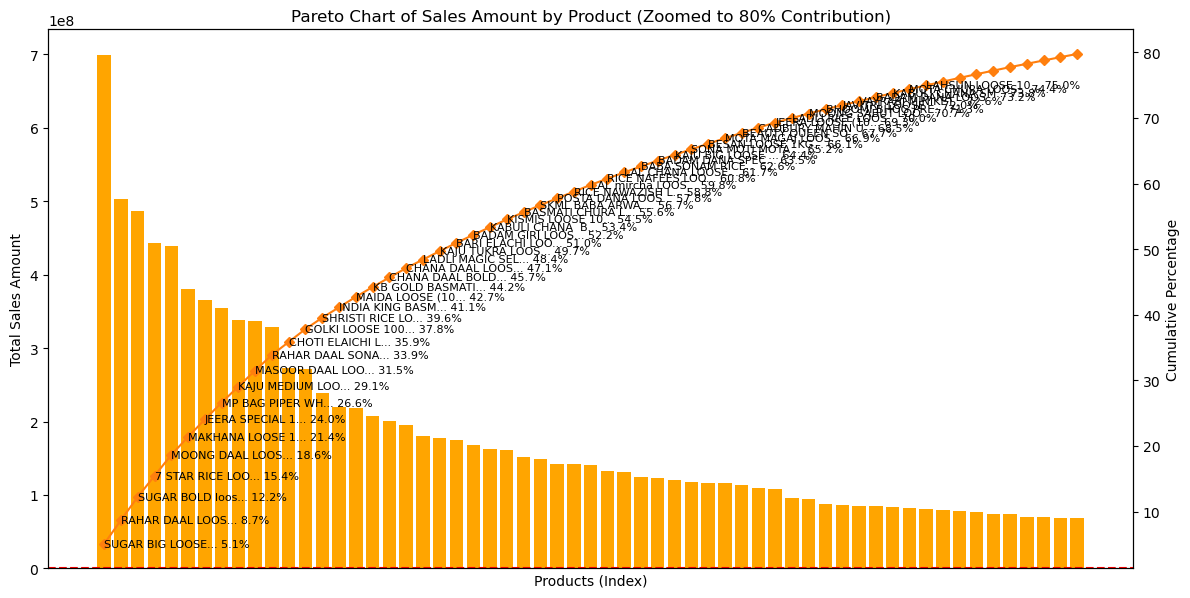

In [48]:
import matplotlib.pyplot as plt

# Adjust the number of products to display
num_display = 50

# Recalculating the total sales amount for each product
stock_data_cleaned['TotalSales'] = stock_data_cleaned['ProdSaleRate'] * stock_data_cleaned['PurchaseQty']

# Summarizing the data to calculate total sales amount by product
sales_pareto_data = stock_data_cleaned.groupby('NameToDisplay')['TotalSales'].sum().sort_values(ascending=False).reset_index()

# Calculate the cumulative percentage
sales_pareto_data['Cumulative Percentage'] = sales_pareto_data['TotalSales'].cumsum() / sales_pareto_data['TotalSales'].sum() * 100

# Extract only the portion of the data that contributes to the first 80% of sales
sales_pareto_data_80 = sales_pareto_data[sales_pareto_data['Cumulative Percentage'] <= 80].copy()

# Plotting the Pareto chart
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(range(len(sales_pareto_data_80)), sales_pareto_data_80['TotalSales'], color='orange')
ax2 = ax.twinx()
ax2.plot(range(len(sales_pareto_data_80)), sales_pareto_data_80['Cumulative Percentage'], color='C1', marker='D', ms=5)
ax.axhline(y=80, color='red', linestyle='--')

ax.set_xticks([])

# Add labels for the top products
for i, row in sales_pareto_data_80.iloc[:num_display].iterrows():
    ax2.text(i, row['Cumulative Percentage'], f"{row['NameToDisplay'][:15]}... {row['Cumulative Percentage']:.1f}%", 
             ha='left', va='center', fontsize=8)

ax.set_title('Pareto Chart of Sales Amount by Product (Zoomed to 80% Contribution)')
ax.set_xlabel('Products (Index)')
ax.set_ylabel('Total Sales Amount')
ax2.set_ylabel('Cumulative Percentage')

plt.show()


In [60]:
import pandas as pd

# Total number of unique products
total_products = stock_data_cleaned['NameToDisplay'].nunique()

# Calculate total sales for each product
product_sales = stock_data_cleaned.groupby('NameToDisplay')['SalesValue'].sum()

# Sort the products by sales in descending order
product_sales_sorted = product_sales.sort_values(ascending=False)

# Calculate the cumulative sales as a percentage of total sales
cumulative_sales = product_sales_sorted.cumsum() / product_sales_sorted.sum()

# Find the products contributing to 80% of total sales
top_80_products = cumulative_sales[cumulative_sales <= 0.80]

# Convert the Series to a DataFrame for easier CSV export
top_80_products_df = top_80_products.reset_index()
top_80_products_df.columns = ['Product Name', 'Cumulative Percentage']

# Save the DataFrame as a CSV file
top_80_products_df.to_csv('top_80_products.csv', index=False)

# Number of products contributing to 80% of sales
top_80_products_count = len(top_80_products)

# Display results
print(f"Total number of products: {total_products}")
print(f"Number of products contributing to 80% of total sales: {top_80_products_count}")
print(f"Percentage of products contributing to 80% of total sales: {(top_80_products_count / total_products) * 100:.2f}%")

# Displaying the first 10 products for brevity
print(f"Products contributing to 80% of total sales: {top_80_product_names[:10]} ...")


Total number of products: 7743
Number of products contributing to 80% of total sales: 788
Percentage of products contributing to 80% of total sales: 10.18%
Products contributing to 80% of total sales: ['AASHIRVAAD ATTA 5KG', 'SUGAR BIG LOOSE(1000 GMS)', 'ENGINE KACHI GHANI MUSTARD OIL 1 L', 'FORTUNE SOYA OIL 1 L', 'RAHAR DAAL LOOSE 1000 GM(1000 GM)', 'AASHIRVAAD ATTA 26kg', 'SUGAR BOLD loose(1000 GM)', '7 STAR RICE LOOSE(1000 GM)', 'MP BAG PIPER WHEAT LOOSE (1000 GMS)', 'JEERA SPECIAL 1000 GM(1000 GM)'] ...


EOQ Analysis

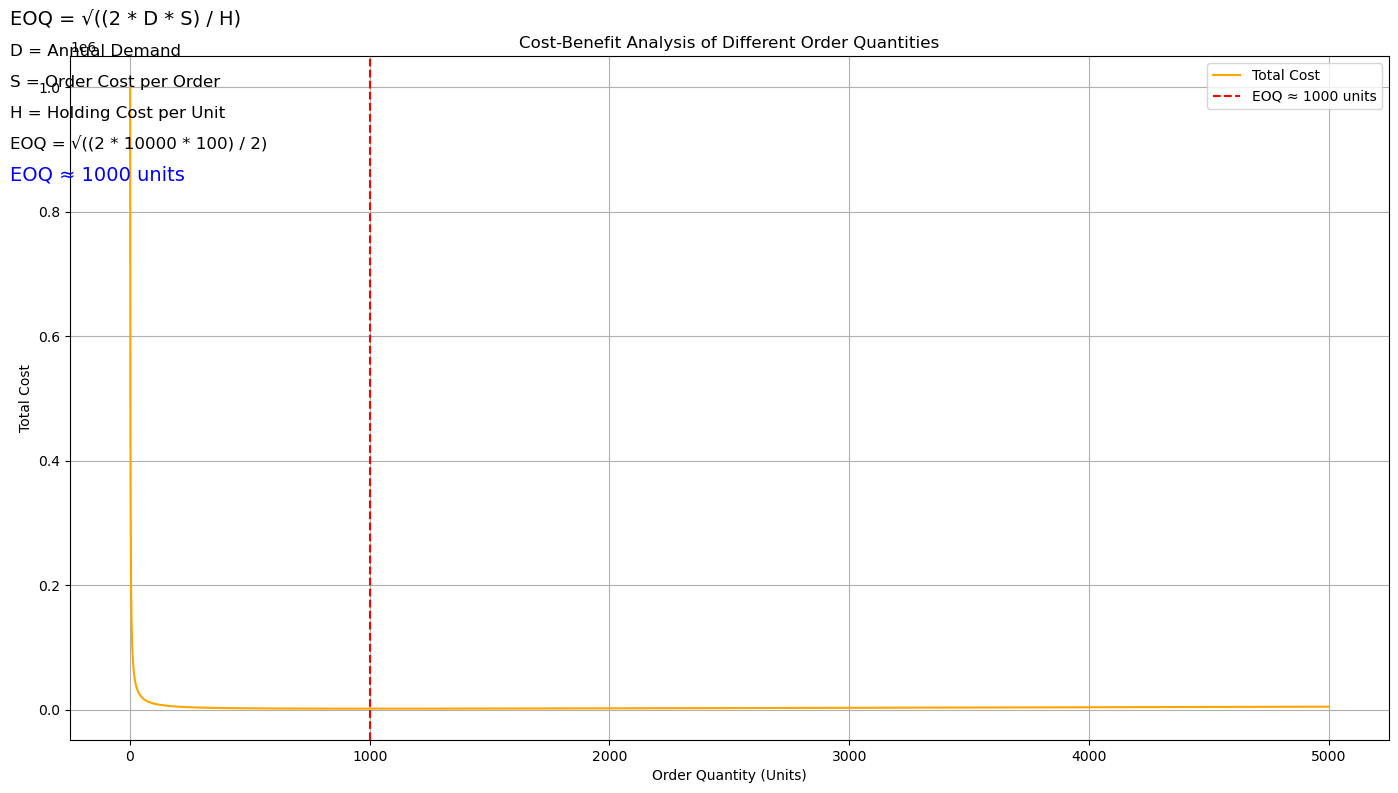

In [11]:
# EOQ Calculation Parameters
D = 10000  # Annual demand in units
S = 100    # Ordering cost per order in INR
H = 2      # Holding cost per unit in INR

# EOQ formula
EOQ = np.sqrt((2 * D * S) / H)

# Order quantities for the analysis
order_quantities = np.arange(1, 5001)

# Total cost for each order quantity
total_cost = (D / order_quantities) * S + (order_quantities / 2) * H

# Plotting the Cost-Benefit Analysis
plt.figure(figsize=(14, 8))

# Plot total cost curve
plt.plot(order_quantities, total_cost, label='Total Cost', color='orange')

# Mark the EOQ point
plt.axvline(x=EOQ, color='red', linestyle='--', label=f'EOQ ≈ {int(EOQ)} units')

# Add EOQ formula and result on the left side of the graph
plt.text(-500, max(total_cost) * 1.1, 'EOQ = √((2 * D * S) / H)', fontsize=14, ha='left')
plt.text(-500, max(total_cost) * 1.05, 'D = Annual Demand', fontsize=12, ha='left')
plt.text(-500, max(total_cost) * 1.00, 'S = Order Cost per Order', fontsize=12, ha='left')
plt.text(-500, max(total_cost) * 0.95, 'H = Holding Cost per Unit', fontsize=12, ha='left')
plt.text(-500, max(total_cost) * 0.90, f'EOQ = √((2 * {D} * {S}) / {H})', fontsize=12, ha='left')
plt.text(-500, max(total_cost) * 0.85, f'EOQ ≈ {int(EOQ)} units', fontsize=14, ha='left', color='blue')

# Graph labels and title
plt.title('Cost-Benefit Analysis of Different Order Quantities')
plt.xlabel('Order Quantity (Units)')
plt.ylabel('Total Cost')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [12]:
product_sales = stock_data_cleaned.groupby('NameToDisplay')['SalesValue'].sum().sort_values(ascending=False)
cumulative_sales = product_sales.cumsum() / product_sales.sum()

# Identify the top 20% of products that contribute to 80% of the sales
pareto_cutoff = cumulative_sales[cumulative_sales <= 0.8]

# Summary of the top products contributing to 80% of the sales
pareto_cutoff_summary = pareto_cutoff.index.tolist()
pareto_cutoff_summary[:10]  # Show top 10 products for brevity

['AASHIRVAAD ATTA 5KG',
 'SUGAR BIG LOOSE(1000 GMS)',
 'ENGINE KACHI GHANI MUSTARD OIL 1 L',
 'FORTUNE SOYA OIL 1 L',
 'RAHAR DAAL LOOSE 1000 GM(1000 GM)',
 'AASHIRVAAD ATTA 26kg',
 'SUGAR BOLD loose(1000 GM)',
 '7 STAR RICE LOOSE(1000 GM)',
 'MP BAG PIPER WHEAT LOOSE (1000 GMS)',
 'JEERA SPECIAL 1000 GM(1000 GM)']

In [13]:
# For EOQ calculation, let's assume some basic parameters for cost estimation:
# - Demand (D): Average monthly sales for each product
# - Ordering cost (S): Fixed cost per order (assumed value)
# - Holding cost (H): Cost of holding one unit in inventory per month (assumed value)


ordering_cost = 100  # fixed cost per order (INR)
holding_cost_per_unit = 2  #holding cost per unit per month (INR)

# Calculate the average monthly demand (D) for the top products from Pareto Analysis
monthly_demand = stock_data_cleaned[stock_data_cleaned['NameToDisplay'].isin(pareto_cutoff_summary[:10])]
monthly_demand = monthly_demand.groupby('NameToDisplay')['SalesQty'].sum() / 12  # Monthly average demand

# Calculate EOQ for each product
eoq = ((2 * ordering_cost * monthly_demand) / holding_cost_per_unit)**0.5

# Create a summary table for EOQ
eoq_summary = pd.DataFrame({
    'Product Name': eoq.index,
    'Monthly Demand (Units)': monthly_demand.values,
    'EOQ (Units)': eoq.values
})

# Display the EOQ summary
eoq_summary.sort_values(by='EOQ (Units)', ascending=False).head(10)  # Show top 10 products by EOQ


,Product Name,Monthly Demand (Units),EOQ (Units)
8,SUGAR BIG LOOSE(1000 GMS),1.328267e+06,11525.048084
9,SUGAR BOLD loose(1000 GM),8.823948e+05,9393.586908
6,MP BAG PIPER WHEAT LOOSE (1000 GMS),7.237328e+05,8507.248870
0,7 STAR RICE LOOSE(1000 GM),7.207629e+05,8489.775714
7,RAHAR DAAL LOOSE 1000 GM(1000 GM),2.557292e+05,5056.967141
5,JEERA SPECIAL 1000 GM(1000 GM),4.348750e+04,2085.365675
3,ENGINE KACHI GHANI MUSTARD OIL 1 L,3.984167e+02,199.603774
4,FORTUNE SOYA OIL 1 L,3.646667e+02,190.962474
2,AASHIRVAAD ATTA 5KG,3.516667e+02,187.527776
1,AASHIRVAAD ATTA 26kg,4.541667e+01,67.391889


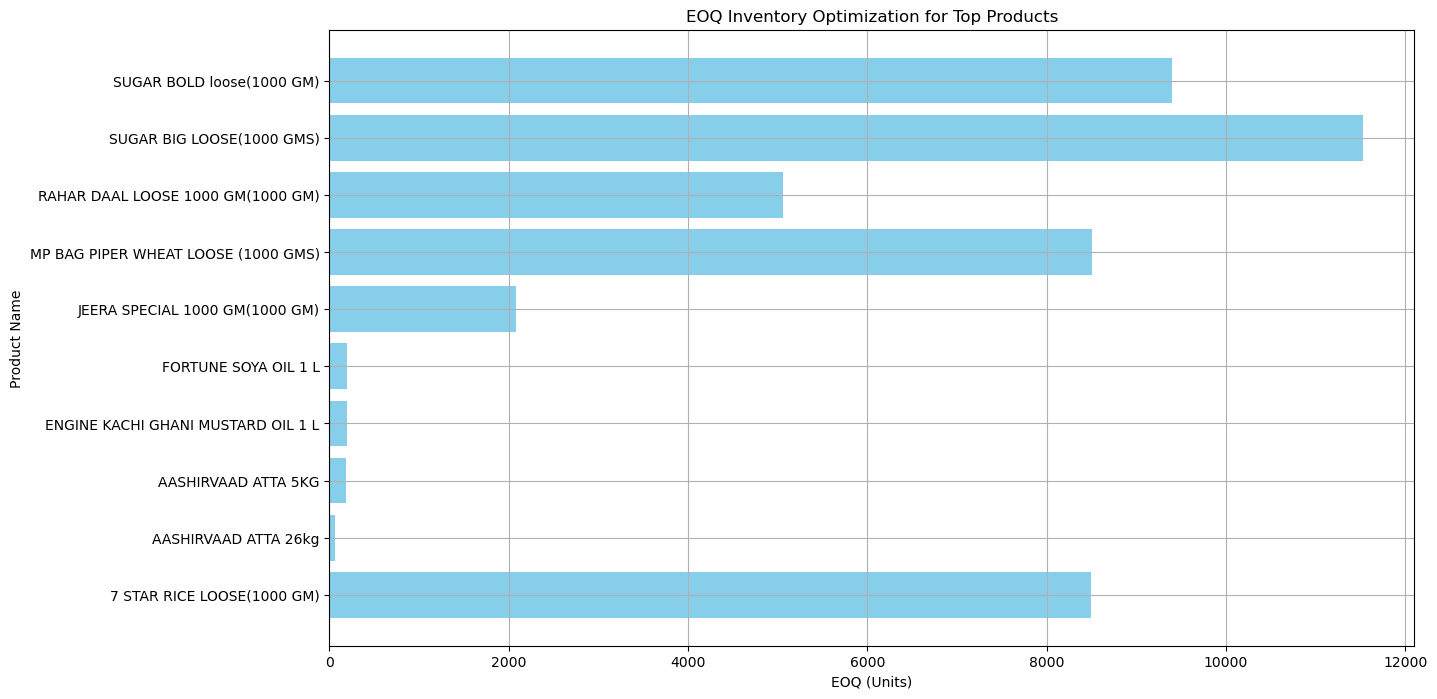

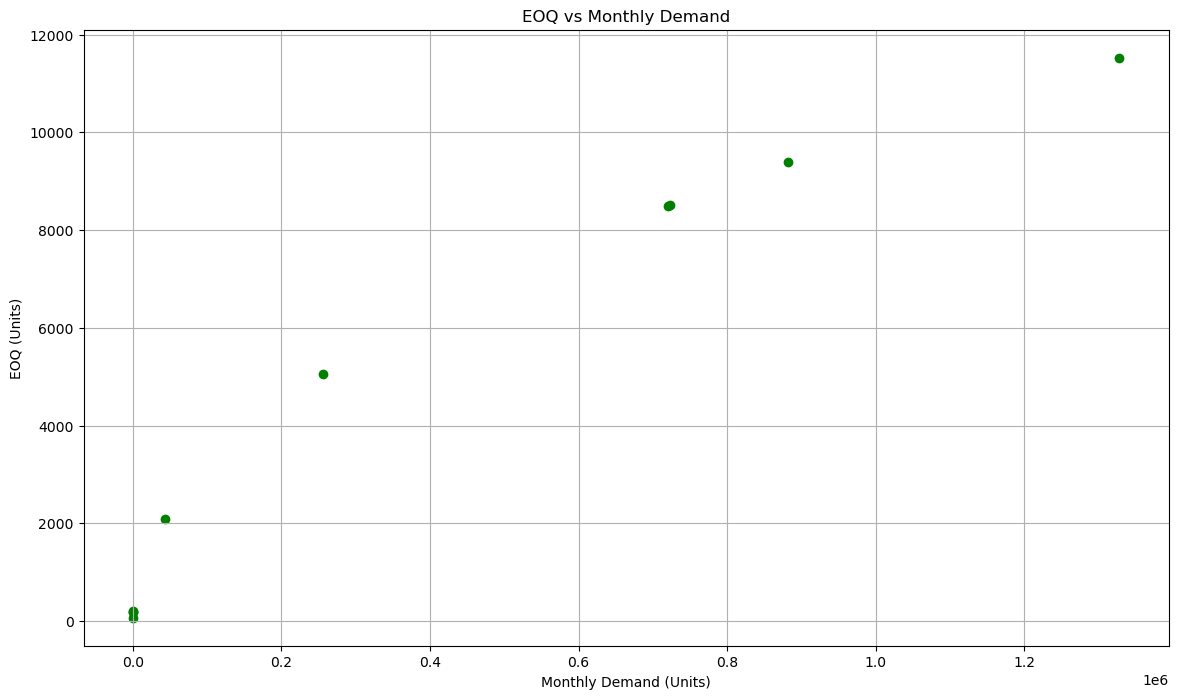

In [14]:
# Plotting EOQ Results for the top 10 products
plt.figure(figsize=(14, 8))
plt.barh(eoq_summary['Product Name'], eoq_summary['EOQ (Units)'], color='skyblue')
plt.title('EOQ Inventory Optimization for Top Products')
plt.xlabel('EOQ (Units)')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

# Additional plot: EOQ vs Monthly Demand
plt.figure(figsize=(14, 8))
plt.scatter(eoq_summary['Monthly Demand (Units)'], eoq_summary['EOQ (Units)'], color='green', marker='o')
plt.title('EOQ vs Monthly Demand')
plt.xlabel('Monthly Demand (Units)')
plt.ylabel('EOQ (Units)')
plt.grid(True)
plt.show()

Sesitivity Analysis of SUGAR BIG LOOSE(1000 GMS)

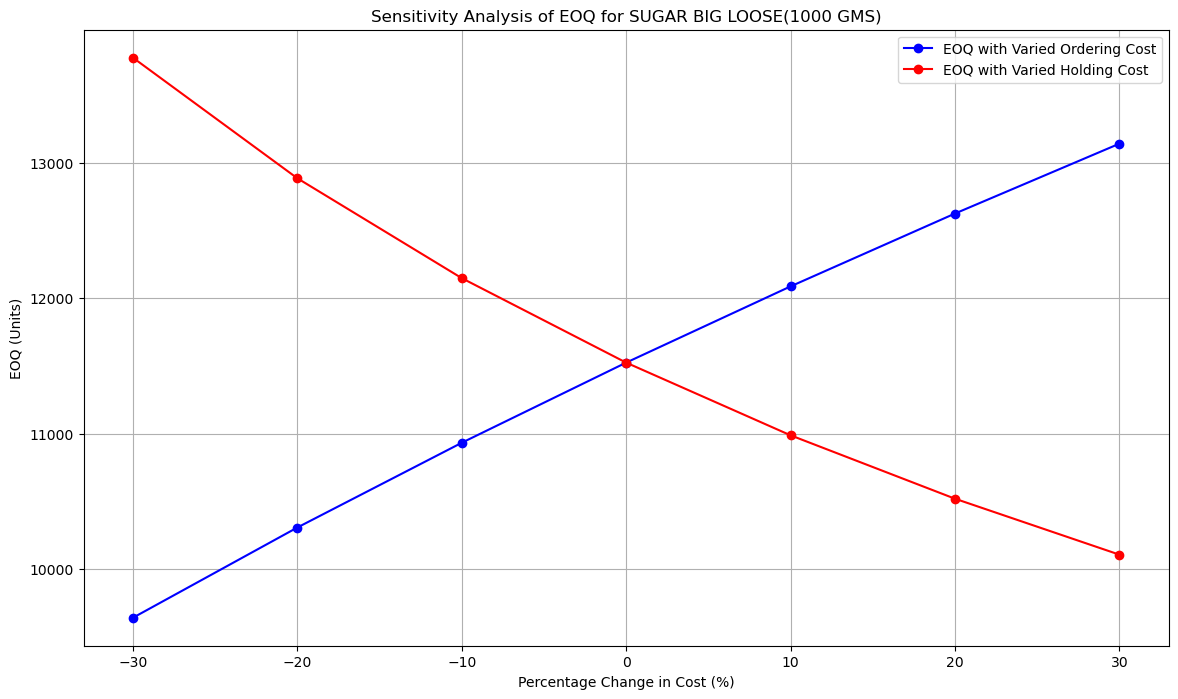

,Factor,Varied Ordering Cost EOQ,Varied Holding Cost EOQ
0,-0.3,9642.547036,13775.067194
1,-0.2,10308.316384,12885.395480
2,-0.1,10933.620626,12148.467363
3,0.0,11525.048084,11525.048084
4,0.1,12087.572406,10988.702187
5,0.2,12625.057624,10520.881353
6,0.3,13140.576598,10108.135845


In [15]:
# Define a function to calculate EOQ based on varying ordering cost and holding cost
def calculate_eoq(demand, ordering_cost, holding_cost):
    return ((2 * ordering_cost * demand) / holding_cost) ** 0.5

# Select a top product from the Pareto Analysis (e.g., 'SUGAR BIG LOOSE(1000 GMS)')
product_name = 'SUGAR BIG LOOSE(1000 GMS)'
monthly_demand_value = monthly_demand[product_name]

# Base costs
base_ordering_cost = 100  # INR
base_holding_cost = 2  # INR per unit

# Sensitivity ranges (±10%, ±20%, ±30%)
sensitivity_factors = [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]

# Store results
sensitivity_results = []

for factor in sensitivity_factors:
    varied_ordering_cost = base_ordering_cost * (1 + factor)
    varied_holding_cost = base_holding_cost * (1 + factor)
    
    eoq_ordering_sensitivity = calculate_eoq(monthly_demand_value, varied_ordering_cost, base_holding_cost)
    eoq_holding_sensitivity = calculate_eoq(monthly_demand_value, base_ordering_cost, varied_holding_cost)
    
    sensitivity_results.append({
        'Factor': factor,
        'Varied Ordering Cost EOQ': eoq_ordering_sensitivity,
        'Varied Holding Cost EOQ': eoq_holding_sensitivity
    })

# Convert results to a DataFrame for better visualization
sensitivity_df = pd.DataFrame(sensitivity_results)

# Plotting the sensitivity analysis results
plt.figure(figsize=(14, 8))
plt.plot(sensitivity_df['Factor'] * 100, sensitivity_df['Varied Ordering Cost EOQ'], marker='o', linestyle='-', color='blue', label='EOQ with Varied Ordering Cost')
plt.plot(sensitivity_df['Factor'] * 100, sensitivity_df['Varied Holding Cost EOQ'], marker='o', linestyle='-', color='red', label='EOQ with Varied Holding Cost')
plt.title('Sensitivity Analysis of EOQ for SUGAR BIG LOOSE(1000 GMS)')
plt.xlabel('Percentage Change in Cost (%)')
plt.ylabel('EOQ (Units)')
plt.grid(True)
plt.legend()
plt.show()

# Display the sensitivity analysis results
sensitivity_df

Trend Analysis

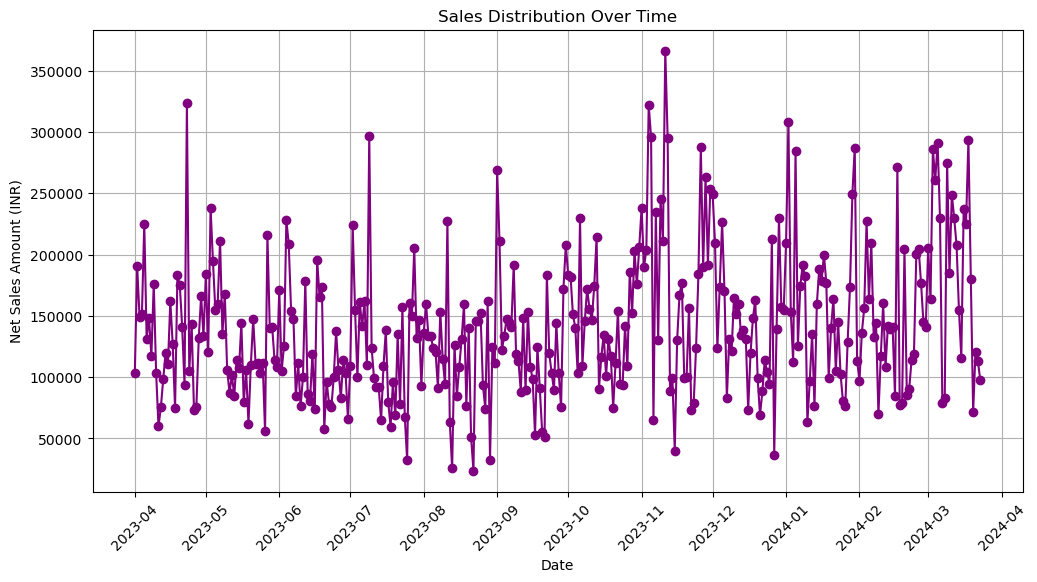

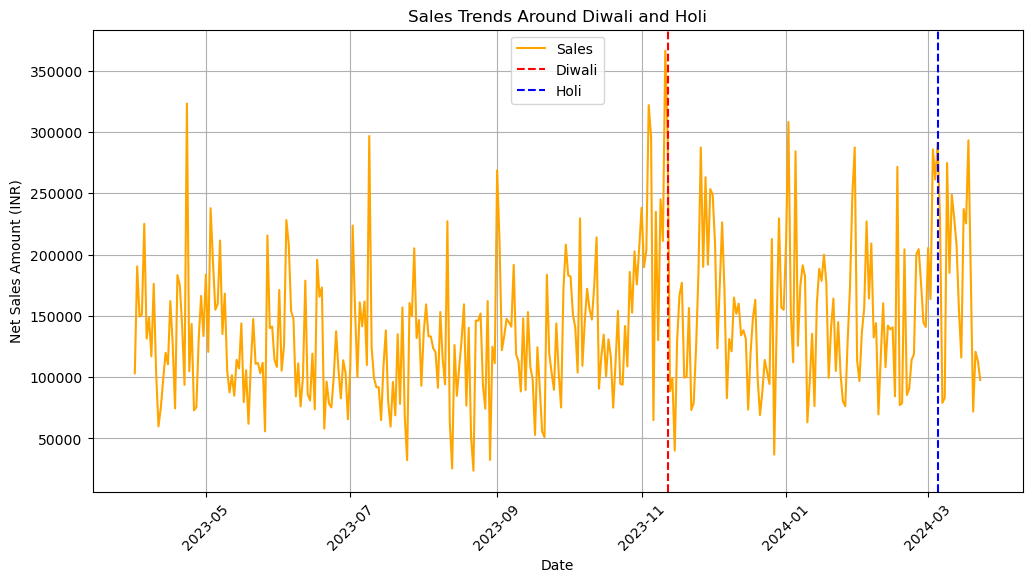

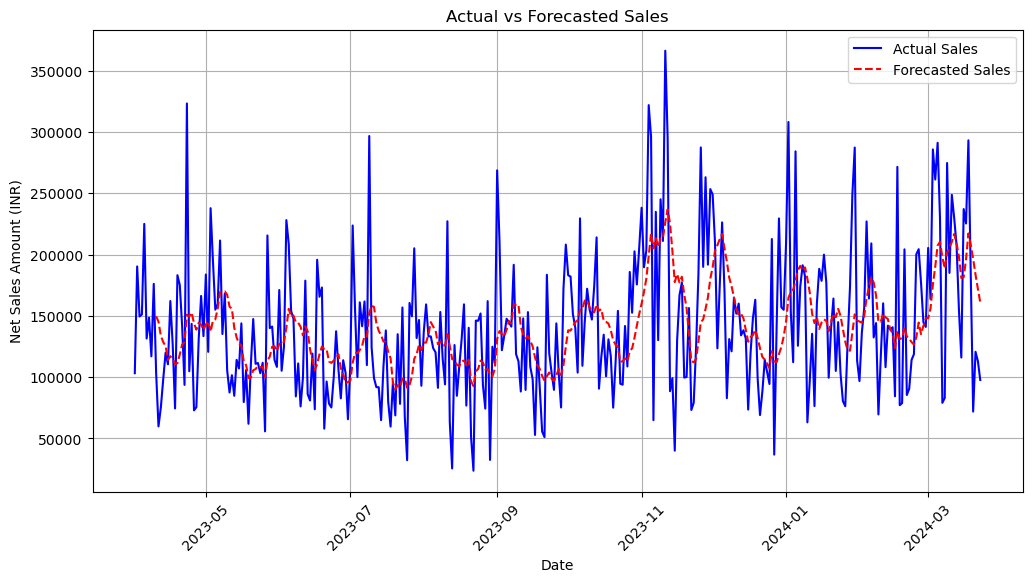

In [62]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import numpy as np
sales_data['Date'] = pd.date_range(start='2023-04-01', periods=len(sales_data), freq='D')

# Sales Distribution over Time
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['Net Amount'], color='purple', marker='o')
plt.title('Sales Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Net Sales Amount (INR)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.show()

# Seasonality Trends Around Diwali and Holi
diwali_holi_dates = ['2023-11-12', '2024-03-5']
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['Net Amount'], color='orange', label='Sales')
plt.axvline(pd.to_datetime(diwali_holi_dates[0]), color='red', linestyle='--', label='Diwali')
plt.axvline(pd.to_datetime(diwali_holi_dates[1]), color='blue', linestyle='--', label='Holi')
plt.title('Sales Trends Around Diwali and Holi')
plt.xlabel('Date')
plt.ylabel('Net Sales Amount (INR)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Demand Forecasting using Rolling Mean
forecasted_sales = sales_data['Net Amount'].rolling(window=10).mean()
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['Net Amount'], label='Actual Sales', color='blue')
plt.plot(sales_data['Date'], forecasted_sales, label='Forecasted Sales', color='red', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales Amount (INR)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


/var/folders/lv/m4x20br14h175nk4crdmk1mh0000gn/T/ipykernel_88344/3277956370.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_trend = sales_data['Net Amount'].resample('M').sum()


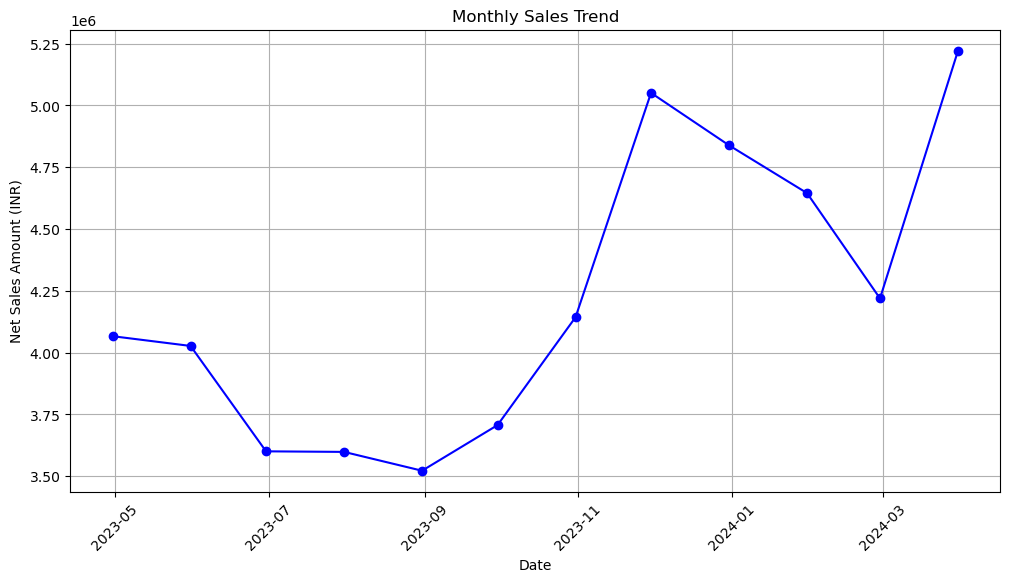

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime, specifying the correct format
sales_data['Date'] = pd.to_datetime(sales_data['Transaction'], dayfirst=True)

# Set the date column as the index
sales_data.set_index('Date', inplace=True)

# Resample sales data by month to identify longer-term trends
monthly_sales_trend = sales_data['Net Amount'].resample('M').sum()

# Plotting the Monthly Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_trend, marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Net Sales Amount (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Average Sales Amount By Month

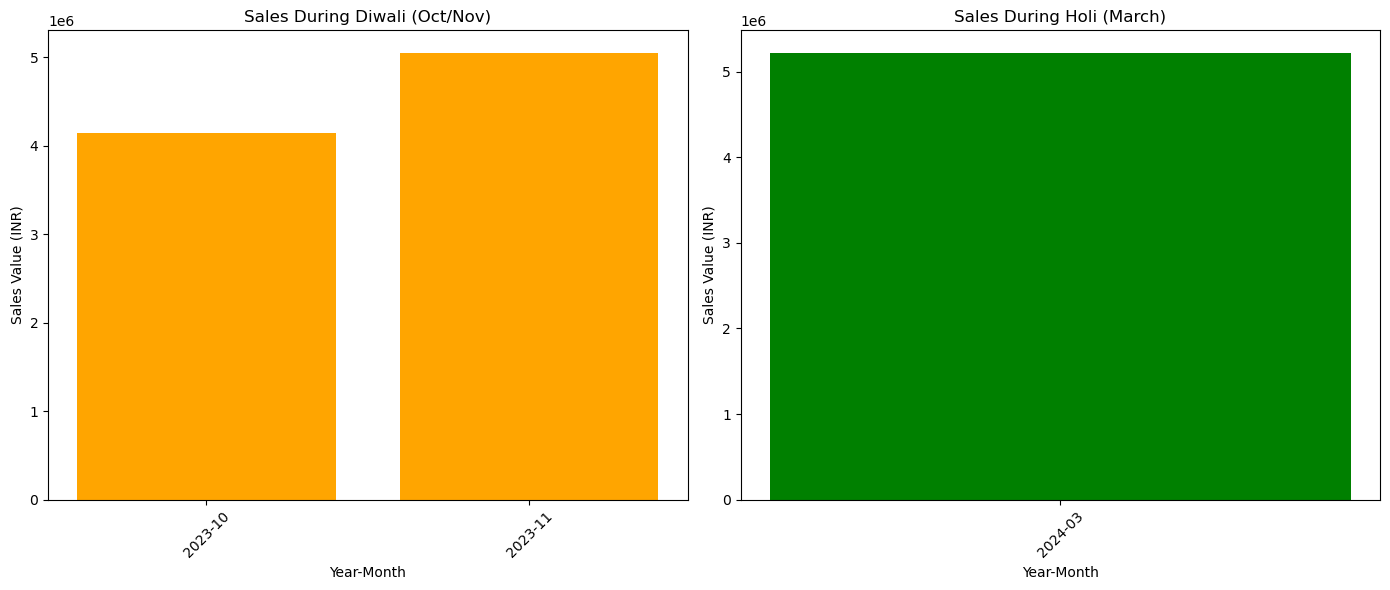

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
sales_data['Transaction'] = pd.to_datetime(sales_data['Transaction'],format="%d/%m/%Y", errors='coerce')

# Extract the year and month from the 'Date' column for grouping
sales_data['YearMonth'] = sales_data['Transaction'].dt.to_period('M')

# Grouping sales by month
monthly_sales = sales_data.groupby('YearMonth')['Received Amount'].sum()

# Extracting sales for specific months corresponding to Diwali and Holi
# Diwali typically occurs in October or November
# Holi typically occurs in March

diwali_sales = monthly_sales[monthly_sales.index.month.isin([10, 11])]
holi_sales = monthly_sales[monthly_sales.index.month == 3]

# Plotting side-by-side bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Diwali Sales
axes[0].bar(diwali_sales.index.astype(str), diwali_sales.values, color='orange')
axes[0].set_title('Sales During Diwali (Oct/Nov)')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Sales Value (INR)')
axes[0].tick_params(axis='x', rotation=45)

# Holi Sales
axes[1].bar(holi_sales.index.astype(str), holi_sales.values, color='green')
axes[1].set_title('Sales During Holi (March)')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Sales Value (INR)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


    Month  Average Sales Value
0       1        149819.258065
1       2        145497.758621
2       3        186471.678571
3       4        135553.766667
4       5        129909.161290
5       6        120031.000000
6       7        124090.103448
7       8        113605.483871
8       9        123564.433333
9      10        142795.586207
10     11        174161.655172
11     12        156083.741935


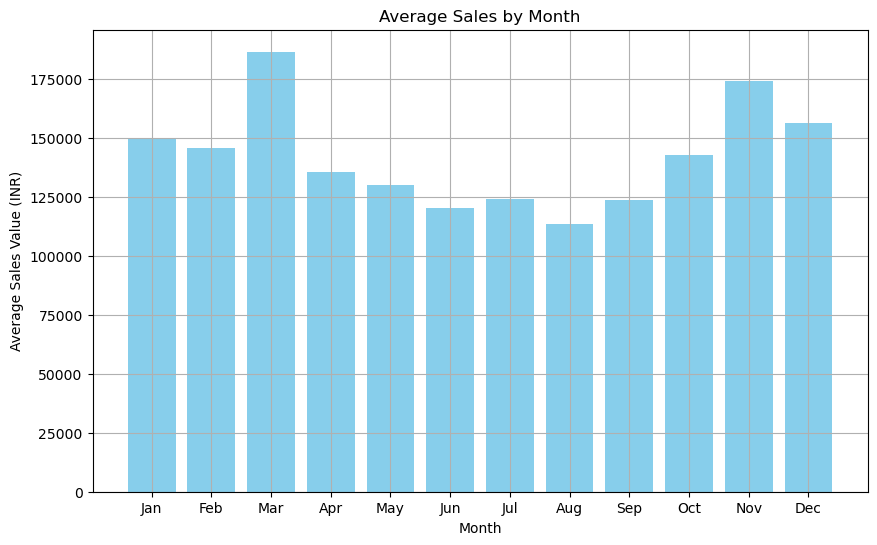

In [71]:
import pandas as pd

# Ensure the 'Date' column is in datetime format with the correct format specified
sales_data['Transaction'] = pd.to_datetime(sales_data['Transaction'], format="%d/%m/%Y", errors='coerce')

# Extract the month from the 'Date' column
sales_data['Month'] = sales_data['Transaction'].dt.month

# Group by month and calculate the average sales
average_sales_by_month = sales_data.groupby('Month')['Received Amount'].mean().reset_index()

# Rename columns for clarity
average_sales_by_month.columns = ['Month', 'Average Sales Value']

# Display the average sales by month
print(average_sales_by_month)

# Optionally, you can plot the average sales by month
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_month['Month'], average_sales_by_month['Average Sales Value'], color='skyblue')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales Value (INR)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Regression Analysis

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

#feature selection: Choosing columns that have a strong relationship with the target
X = stock_data_cleaned[['SalesQty', 'ProdMRP']]
y = stock_data_cleaned['SalesValue']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures() 
X_poly = poly.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.2f}')


R^2 Score: 0.66


R^2 Score: 0.66


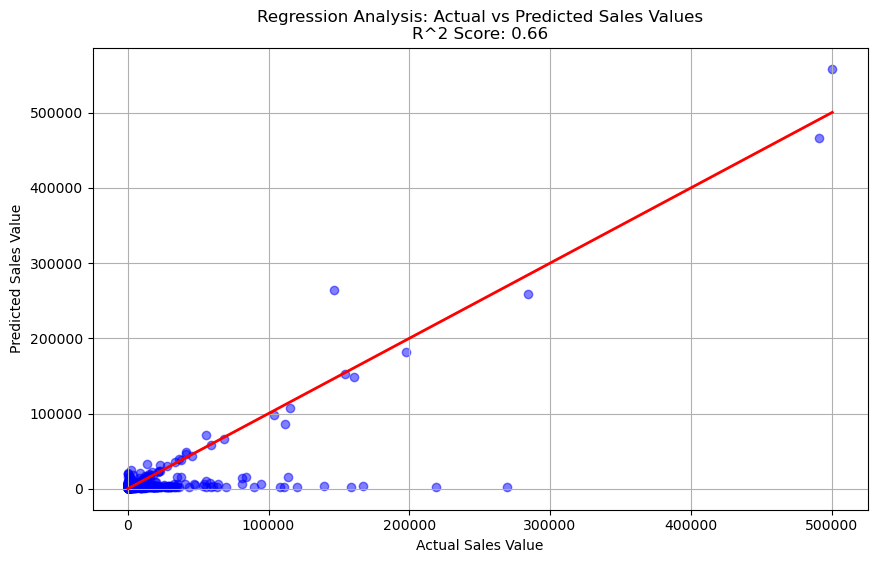

In [64]:
import matplotlib.pyplot as plt

# feature selection: Choosing columns that have a strong relationship with the target
X = stock_data_cleaned[['SalesQty', 'ProdMRP']]
y = stock_data_cleaned['SalesValue']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures()  # Default degree is 2
X_poly = poly.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) 
plt.title(f'Regression Analysis: Actual vs Predicted Sales Values\nR^2 Score: {r2:.2f}')
plt.xlabel('Actual Sales Value')
plt.ylabel('Predicted Sales Value')
plt.grid(True)
plt.show()
